In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.layers import Dropout

In [4]:
from tensorflow.keras import utils  #用於分類資料轉換等 Keras 工具
np.random.seed(10) #設定隨機種子，讓每次程式產生的隨機值都一致

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

# **資料預處理**

In [6]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [7]:
x_Train_normalize = x_train_image/255
x_Test_normalize = x_test_image/255

In [8]:
y_Train_OneHot = utils.to_categorical(y_train_label)
y_Test_OneHot = utils.to_categorical(y_test_label)

In [9]:
x_train_image.shape

(50000, 32, 32, 3)

# **模型建立**

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32,(5,5),padding='same',
         input_shape=(32,32,3),
         activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPool2D())

In [16]:
model.add(Conv2D(64,(3,3),padding='same',
         activation='relu'))

In [17]:
model.add(Dropout(0.25))

In [18]:
model.add(MaxPool2D())

In [19]:
model.add(Flatten())

In [20]:
model.add(Dropout(0.25))

In [21]:
model.add(Dense(
    units = 1024,
    kernel_initializer='normal',
    activation='relu'))

In [22]:
model.add(Dropout(0.25))

In [23]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [24]:
print(model.summary())  # 檢查用

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,226,506 (16.12 MB)

 Trainable params: 4,226,506 (16.12 MB)

 Non-trainable params: 0 (0.00 B)

None


# **訓練模型**

In [25]:
model.compile(
    loss='categorical_crossentropy',  # 損失函數
    optimizer= Adam(learning_rate = 0.001),                 # 最佳化器
    metrics=['accuracy']             # 評估指標
)

In [26]:
train_history = model.fit(
    x = x_Train_normalize,         # 訓練資料（特徵）→ 已經標準化
    y = y_Train_OneHot,            # 訓練標籤（目標）→ One-hot 編碼
    validation_split = 0.2,        # 20% 訓練資料作為驗證資料（不用額外給 validation set）
    epochs = 20,                   # 訓練 10 輪（整份資料訓練 10 次）
    batch_size = 128,              # 每批次送入 400 筆資料
    verbose = 2,                   # 顯示訓練過程資訊（2 表示精簡模式：每輪顯示一行）
)

Epoch 1/20
313/313 - 17s - 56ms/step - accuracy: 0.4268 - loss: 1.6030 - val_accuracy: 0.5266 - val_loss: 1.4082
Epoch 2/20
313/313 - 3s - 8ms/step - accuracy: 0.5727 - loss: 1.2012 - val_accuracy: 0.6203 - val_loss: 1.1760
Epoch 3/20
313/313 - 3s - 8ms/step - accuracy: 0.6301 - loss: 1.0457 - val_accuracy: 0.6360 - val_loss: 1.0763
Epoch 4/20
313/313 - 3s - 8ms/step - accuracy: 0.6692 - loss: 0.9315 - val_accuracy: 0.6627 - val_loss: 1.0114
Epoch 5/20
313/313 - 3s - 9ms/step - accuracy: 0.7054 - loss: 0.8335 - val_accuracy: 0.6881 - val_loss: 0.9219
Epoch 6/20
313/313 - 5s - 16ms/step - accuracy: 0.7440 - loss: 0.7268 - val_accuracy: 0.7096 - val_loss: 0.8671
Epoch 7/20
313/313 - 3s - 8ms/step - accuracy: 0.7755 - loss: 0.6383 - val_accuracy: 0.7048 - val_loss: 0.8586
Epoch 8/20
313/313 - 6s - 18ms/step - accuracy: 0.8074 - loss: 0.5486 - val_accuracy: 0.7222 - val_loss: 0.8117
Epoch 9/20
313/313 - 3s - 8ms/step - accuracy: 0.8304 - loss: 0.4804 - val_accuracy: 0.7330 - val_loss: 0.77

# **以圖形顯示訓練過程**

In [27]:
train_history.history

{'accuracy': [0.42682498693466187,
  0.5727499723434448,
  0.6300749778747559,
  0.6692000031471252,
  0.7053999900817871,
  0.7440249919891357,
  0.7754999995231628,
  0.8073750138282776,
  0.8304499983787537,
  0.852774977684021,
  0.8739500045776367,
  0.8899250030517578,
  0.9067249894142151,
  0.9148499965667725,
  0.9264249801635742,
  0.9288250207901001,
  0.9363999962806702,
  0.9425749778747559,
  0.9480999708175659,
  0.9489750266075134],
 'loss': [1.603036642074585,
  1.2011582851409912,
  1.0457414388656616,
  0.9315358400344849,
  0.8335278034210205,
  0.7267516255378723,
  0.6382840871810913,
  0.5486494302749634,
  0.4803985357284546,
  0.42345619201660156,
  0.35709822177886963,
  0.31284186244010925,
  0.26714861392974854,
  0.24210117757320404,
  0.21225649118423462,
  0.20461584627628326,
  0.18549464643001556,
  0.1685236692428589,
  0.150644451379776,
  0.147851824760437],
 'val_accuracy': [0.5266000032424927,
  0.6202999949455261,
  0.6359999775886536,
  0.6626999

In [28]:
import matplotlib.pyplot as plt

# 畫出訓練過程每一個epoch訓練資料與驗證資料各自準確率(accuracy)的變化，或者損失誤差(loss)的變化
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

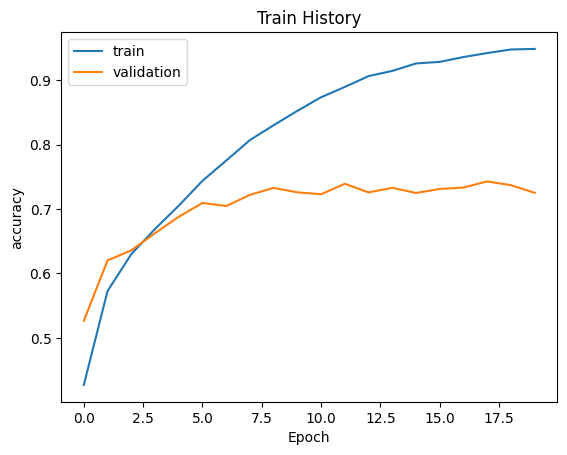

In [29]:
show_train_history(train_history,'accuracy','val_accuracy')

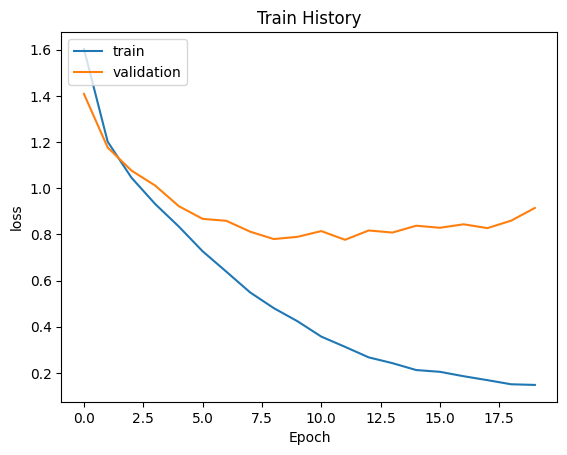

In [30]:
show_train_history(train_history,'loss','val_loss')

# **評估模型準確率**

In [32]:
scores = model.evaluate(x_test_image, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6581 - loss: 184.6608

accuracy= 0.6586999893188477


# **進行預測**

In [33]:
class_names = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [34]:
prediction=model.predict(x_test_image)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [35]:
predicted_lable = np.argmax(prediction[6])
predicted_lable

1

神經網路預測是： car
實際是： car


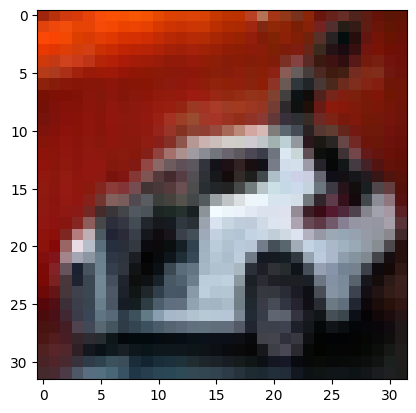

In [36]:
print('神經網路預測是：', class_names[predicted_lable])
print('實際是：', class_names[y_test_label[6].item()])
plt.imshow(x_test_image[6], cmap='Greys');  # 測試圖片需reshape為原來32x32

In [37]:
# 一次呈現數張測試資料(圖片)、預測結果與真實結果，最多25張，預設10張
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[idx])
        title = "label=" + str(class_names[labels[idx][0]]) + "\n"
        if prediction is not None:
            title += "predict=" + str(class_names[np.argmax(prediction[idx])])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

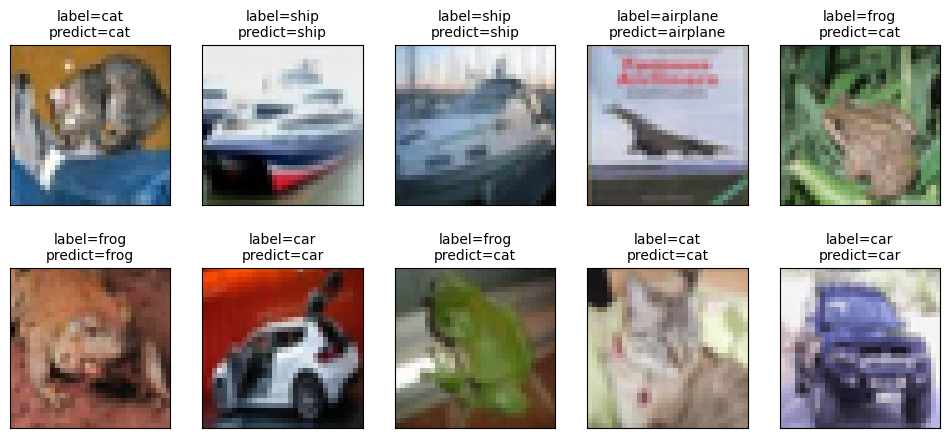

In [38]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# **confusion matrix (混淆矩陣)**

In [39]:
import pandas as pd
# 將10000個預測結果一一轉換為
predicted_labels = np.argmax(prediction, axis=1)

# Now use predicted_labels in crosstab
pd.crosstab(y_test_label.ravel(), predicted_labels, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,841,12,9,12,6,5,1,23,55,36
1,26,783,0,6,3,6,1,10,33,132
2,129,9,390,91,44,145,26,112,32,22
3,80,14,26,440,22,228,24,90,28,48
4,69,6,22,93,417,126,29,210,17,11
5,34,7,11,125,23,673,11,80,19,17
6,24,15,22,114,29,85,609,43,29,30
7,29,2,5,27,16,56,0,839,6,20
8,131,33,5,4,6,9,0,16,759,37


In [40]:
# 每一筆測試資料的真實結果標籤(label)與預測結果標籤(predict)的表格(df)

df = pd.DataFrame({'label': y_test_label.ravel(), 'predict': predicted_labels})
df[:10] # 表格前10筆測試資料

,label,predict
0,3,3
1,8,8
2,8,8
3,0,0
4,6,3
5,6,6
6,1,1
7,6,3
8,3,3
9,1,1


In [41]:
df[(df.label==5)&(df.predict==3)]  # 真實標籤為5，卻預測為3

,label,predict
33,5,3
39,5,3
148,5,3
158,5,3
178,5,3
...,...,...
9657,5,3
9761,5,3
9823,5,3
9844,5,3


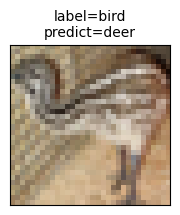

In [42]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

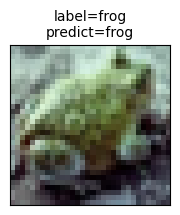

In [43]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd 'content/drive/My Drive/Colab Notebooks'

[Errno 2] No such file or directory: 'content/drive/My Drive/Colab Notebooks'
/content


In [ ]:
model.save('/content/drive/My Drive/hw3_model.keras')

In [ ]:
!ls "/content/drive/My Drive"

 0785._javscat_PGFD-038.mp4
 106級_深度自助旅遊網站建置-臺灣為例_20200706_final.docx
'1120812 CWT-64'
'1120812 CWT-64 (1)'
 112233
'1209 10'
 18校报录比22-24.rar
 19148365-258e-4894-8a50-8b0f4b8b664f.pdf
 3B032089阮彥翔
 3B032089阮彥翔HW1
 3B032089阮彥翔.zip
 812CWT
 818-FF41
 919週記.gdoc
 ac8276b06a01cc92.docx
 C14-租約-230701-240630.xlsx
'Colab Notebooks'
 DIP
 「DSC_9844.JPG」のコピー
 「DSC_9849.JPG」のコピー
 ERP配銷模組精選題庫.pdf
 FF42
'Google Earth'
 hw3_model.keras
 IMG_0245.png
 IMG_6077.HEIC
 IMG_6078.HEIC
 IMG_6079.HEIC
 IMG_6080.HEIC
 IMG_6081.heic
 IMG_6082.heic
 IMG_6083.HEIC
 IMG_6088.heic
 IMG_6089.heic
 IMG_6090.HEIC
 IMG_6091.HEIC
 IMG_6092.HEIC
 IMG_6093.HEIC
 IMG_6094.HEIC
 IMG_6095.HEIC
 IMG_6096.HEIC
 IMG_6097.HEIC
 IMG_6098.heic
 IMG_6099.heic
 IMG_6100.HEIC
 IMG_6101.HEIC
 IMG_6102.HEIC
 IMG_6103.heic
 IMG_6104.HEIC
 IMG_6105.HEIC
 IMG_6106.heic
 IMG_6107.heic
 IMG_6108.heic
 IMG_6109.HEIC
 IMG_6110.HEIC
 IMG_6111.HEIC
 IMG_6112.heic
 IMG_6113.heic
 IMG_6114.HEIC
 IMG_6115.heic
 IMG_6117.HEIC
 IMG_6118.HEIC
